In [2]:
#Step 1 - Import the dataset
import pandas as pd

data = pd.read_csv('banknote_authentication.csv')

In [3]:
#Step 2 - Calculate measures
import numpy as np

#V1
v1 = data['V1']
v1_mean = np.mean(v1)
v1_std = np.std(v1)

#V2
v2 = data['V2']
v2_mean = np.mean(v2)
v2_std = np.std(v2)

print(len(data))

1372


In [4]:
#Step 3 - Vizualize data
import matplotlib.pyplot as plt

#Simple ploting
plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(v1, v2, s= 5)

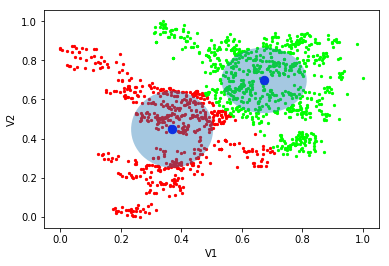

In [8]:
#Use K-means to try and sepparate them into 2 groups
from sklearn.cluster import KMeans
import matplotlib.patches as patches

#Normalize data
v1_v2 = np.column_stack((v1, v2))
v1_v2_min = np.min(v1_v2, axis=0)
v1_v2_max = np.max(v1_v2, axis=0)
v1_v2 = (v1_v2 - v1_v2_min) / (v1_v2_max - v1_v2_min)

#Calculate K-means result
cluster_ammount = 2
km_result = KMeans(n_clusters= cluster_ammount).fit(v1_v2)

#Plot the points and the cluster points
fig, graph = plt.subplots()
graph.set_xlabel('V1')
graph.set_ylabel('V2')

#Make cluster map
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km_result.labels_

#Plot different note clusters
notes_0 = v1_v2[cluster_map['cluster'] == 0]
notes_1 = v1_v2[cluster_map['cluster'] == 1]

graph.scatter(notes_0[:, 0], notes_0[:, 1], s= 5, c= '#ff0000')
graph.scatter(notes_1[:, 0], notes_1[:, 1], s= 5, c= '#00ff00')

#Plot the cluster centers
cluster_centers = km_result.cluster_centers_
graph.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 70, c= '#0000ff')

#Plot Standard Deviation of each cluster
notes_0_std = np.std(notes_0, axis= 0)
graph.add_patch(patches.Ellipse([cluster_centers[0][0], cluster_centers[0][1]], notes_0_std[0]*2, notes_0_std[1]*2, alpha = 0.4))

notes_1_std = np.std(notes_1, axis= 0)
graph.add_patch(patches.Ellipse([cluster_centers[1][0], cluster_centers[1][1]], notes_1_std[0]*2, notes_1_std[1]*2, alpha = 0.4))


# Analysis
In this analysis I thought that doing a K-means classification with k=2 would be the best approach since we are trying to distinguish a note between 2 classes (fake and legitimate), in order to do this I plotted both features and calculated the Clusters, respective Standard Deviations of each cluster and the diffewrent points for each cluster with different colours.
This dataset altough at first glance looks suitable for K-Means clustering when further looking into it I don't believe it is, the V1 feature doesn't seem to have an impact on the classification and there is a large number of outliers in the data which leads me to believe there is no strong clustering of the data points.

# Data Visualization
In this plot we can see the different classes clustered in green and red, we also have the standard deviation for each cluster plotted which shows us that there are a lot of outliers but regardless we can identify the clusters and after running the K-means algorithm multiple times we can also confirm that the Cluster Centres are stable
